In [1]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 63 kB/s 
     |████████████████████████████████| 47.8 MB 1.5 MB/s 


In [9]:
pip install opencv-python-headless==4.5.2.52

     |████████████████████████████████| 38.2 MB 1.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from google.colab import drive
drive.mount('/content/drive')

Found GPU at: /device:GPU:0
Mounted at /content/drive


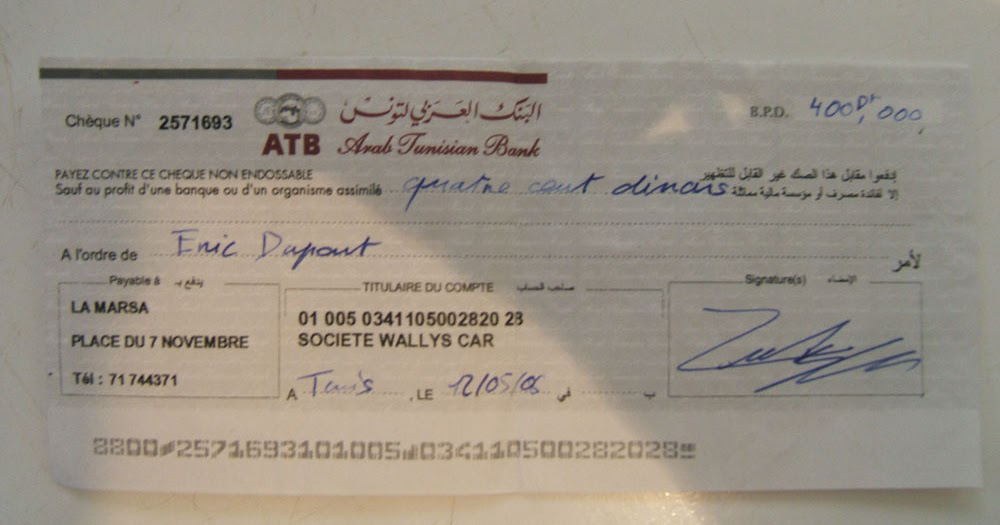

In [6]:
# show an image
import PIL
from PIL import ImageDraw
path='/content/drive/MyDrive/Colab Notebooks/cheque.jpg'
im = PIL.Image.open(path)
im

In [10]:

import easyocr
reader = easyocr.Reader(['fr'])

In [11]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext(path)
#bounds

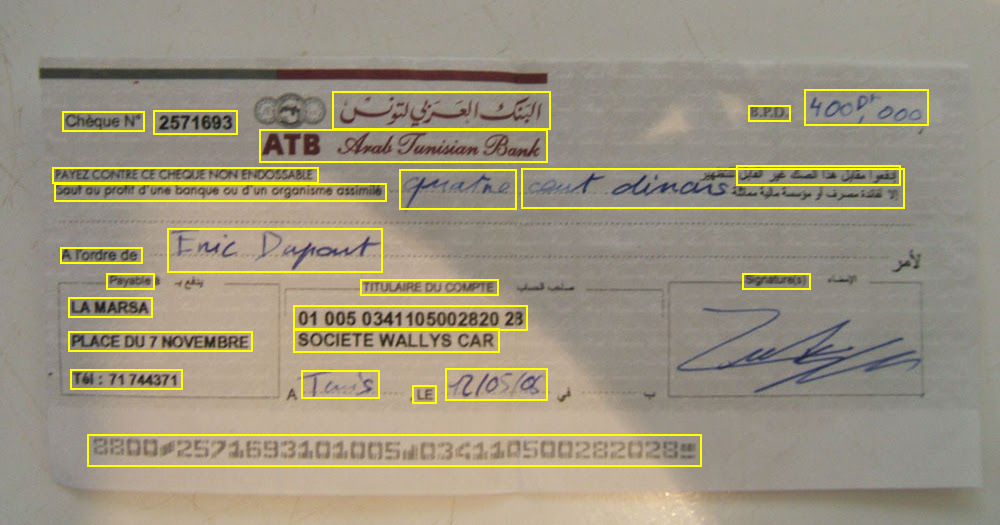

In [12]:
import cv2
# Draw bounding boxes
def draw_boxes(path, bounds, color='yellow', width=2):
    j=0
    image=PIL.Image.open(path)
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        x=p0[0]
        y=p0[1]
        w=p2[0]-x
        h=p2[1]-y
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        im=cv2.imread(path)
        roi=im[y:y+h,x:x+w]
        cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/segmented_img/image"+str(j)+".png",roi)
        j=j+1
    return image

draw_boxes(path, bounds)